**Data Description**

I will be using the Saudi Stock Exchange (Tadawul) This is the data of Saudi stock market companies since 2000-01-01. It was collected from Saudi Stock Exchange

**Features**

Each row in the database represents the price of a specific stock at a specific date:

symbol (Integer): The symbol or the reference number of the company

name(String) Name of the company

trading_name (String): The trading name of the company

sectoer (String): The sector in which the company operates

date (Date): The date of the stock price

open (Decimal): The opening price

high (Decimal): The highest price of the stock at that day

low (Decimal): The lowest price of the stock at that day

close (Decimal): The closing price

change (Decimal): The change in price from the last day

perc_Change (Decimal): The percentage of the change

volume_traded (Decimal): The volume of the trades for the day

value_traded (Decimal): The value of the trades for the day

no_trades (Decimal): The number of trades for the day

What are the most profitable sectors ?

Does the real estate sector achieve high profits sectors? 

In [1]:
print("Importing.....", end="", flush=True)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
print("[Done]")

Importing.....[Done]


In [2]:
df = pd.read_csv('Tadawul_stcks_v2.csv')

In [3]:
df

,symbol,name,tradingName,sectoer,date,open,high,low,close,change,percChange,volumeTraded,valueTraded,noTrades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,3/5/2020,35.55,35.85,34.90,34.90,-0.40,-1.13,436609,1.539907e+07,804.0
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,3/4/2020,34.70,35.65,34.50,35.30,0.25,0.71,737624,2.598139e+07,1268.0
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,3/3/2020,34.70,35.15,34.70,35.05,1.05,3.09,489831,1.711641e+07,854.0
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,3/2/2020,35.20,35.65,34.00,34.00,-0.55,-1.59,736157,2.585870e+07,1242.0
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,3/1/2020,35.35,35.60,34.25,34.55,-2.05,-5.60,738685,2.574797e+07,1625.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593814,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,5/28/2019,22.90,22.90,21.62,22.50,0.00,0.00,1860532,4.149566e+07,2023.0
593815,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,5/27/2019,23.30,23.32,22.24,22.50,-0.84,-3.60,4905676,1.114168e+08,3259.0
593816,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,5/26/2019,24.60,24.60,23.30,23.34,-1.16,-4.73,3908215,9.269862e+07,2672.0
593817,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,5/23/2019,24.80,25.00,24.34,24.50,-0.50,-2.00,4078214,1.002221e+08,5571.0


 Prints the full summary of the selected data frame. A summary list of all columns with their data types and the number of non-values ​​in each column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593819 entries, 0 to 593818
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   symbol         593819 non-null  int64  
 1   name           593819 non-null  object 
 2   tradingName    593819 non-null  object 
 3   sectoer        593819 non-null  object 
 4   date           593819 non-null  object 
 5   open           587364 non-null  float64
 6   high           587122 non-null  float64
 7   low            587122 non-null  float64
 8   close          593819 non-null  float64
 9   change         593819 non-null  float64
 10  percChange     593819 non-null  float64
 11  volumeTraded   593819 non-null  int64  
 12  valueTraded    593819 non-null  float64
 13  noTrades       586128 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 63.4+ MB


Checking for missing values in the DataFrame

In [5]:
df.isna().sum()

symbol              0
name                0
tradingName         0
sectoer             0
date                0
open             6455
high             6697
low              6697
close               0
change              0
percChange          0
volumeTraded        0
valueTraded         0
noTrades         7691
dtype: int64

Summary Statistics Number of mean, standard deviation, minimum and maximum values.

In [6]:
df.describe()

,symbol,open,high,low,close,change,percChange,volumeTraded,valueTraded,noTrades
count,593819.000000,587364.000000,587122.000000,587122.000000,593819.000000,593819.000000,593819.000000,5.938190e+05,5.938190e+05,586128.000000
mean,3952.684793,41.237794,41.971636,40.593406,40.961602,0.001174,0.035652,1.673422e+06,5.008553e+07,960.642348
std,2284.498530,86.713646,89.178183,84.562283,86.491709,4.782545,3.480783,5.482121e+06,1.472969e+08,3401.794136
min,1010.000000,1.950000,1.950000,1.950000,0.000000,-681.200000,-100.000000,0.000000e+00,0.000000e+00,0.000000
25%,2140.000000,16.200000,16.400000,16.000000,16.070000,-0.250000,-0.910000,1.484920e+05,4.114858e+06,158.000000
50%,4004.000000,26.500000,26.905000,26.100000,26.300000,0.000000,0.000000,4.335560e+05,1.210533e+07,376.000000
75%,5110.000000,46.500000,47.200000,45.850000,46.200000,0.250000,0.910000,1.271184e+06,3.561017e+07,900.000000
max,8312.000000,6709.150000,6774.510000,6130.720000,6441.180000,578.430000,1634.440000,7.976659e+08,1.586582e+10,816526.000000


We took a random sample of data and was noticed in one of the null values rows

In [7]:
df.sample(10)

,symbol,name,tradingName,sectoer,date,open,high,low,close,change,percChange,volumeTraded,valueTraded,noTrades
15082,4200,Aldrees Petroleum and Transport Services Co.,ALDREES,Energy,1/18/2009,9.79,10.00,9.71,9.97,0.17,1.73,281899,2786908.55,195.0
272287,4008,Saudi Company for Hardware,SACO,Consumer Discretionary,11/23/2017,70.00,71.47,70.00,70.66,1.06,1.52,56775,4001501.00,135.0
319108,6001,Halwani Bros. Co.,HB,Consumer Staples,5/30/2011,35.44,35.62,34.99,35.35,0.09,0.26,300286,10621848.90,454.0
64713,2180,Filing and Packing Materials Manufacturing Co.,FIPCO,Materials,3/27/2018,32.90,34.20,32.85,33.10,0.46,1.41,709380,23808724.80,1175.0
117438,3008,Al Kathiri Holding Co.,ALKATHIRI,Materials,10/22/2018,NaN,NaN,NaN,20.88,0.00,0.00,0,0.00,0.0
411495,1140,Bank Albilad,ALBILAD,Financials,3/29/2008,13.11,13.11,12.79,12.79,-0.30,-2.29,986379,12728777.25,943.0
125151,3020,Yamama Cement Co.,YSCC,Materials,7/26/2009,26.80,26.90,26.60,26.90,0.20,0.75,265928,7120662.40,141.0
533405,7020,Etihad Etisalat Co.,ETIHAD ETISALAT,Communication Services,4/8/2007,42.00,42.20,40.90,41.10,-1.10,-2.61,1452205,60421878.50,1820.0
245639,4010,Dur Hospitality Co.,DUR,Consumer Discretionary,3/4/2009,15.80,16.85,15.65,16.20,0.50,3.18,949710,15224051.00,551.0
252863,4290,Alkhaleej Training and Education Co.,ALKHALEEJ TRNG,Consumer Discretionary,10/12/2017,17.16,17.40,16.90,17.29,0.28,1.65,368289,6350448.32,255.0


Show the unique values of each sector, and they were observed for the two sectors, and they will be analyzed

In [8]:
df.groupby('sectoer').nunique()

,symbol,name,tradingName,date,open,high,low,close,change,percChange,volumeTraded,valueTraded,noTrades
sectoer,,,,,,,,,,,,,
Communication Services,6,6,6,4716,2740,2854,2734,5320,1049,1642,21202,21374,4832
Consumer Discretionary,24,24,24,4789,4544,4668,4529,8102,1014,2004,53661,55519,5087
Consumer Staples,16,16,16,4759,5754,5831,5635,10496,2097,2139,62799,65258,7362
Energy,5,5,5,4757,1927,1968,1906,3615,736,1579,15656,15795,3731
Financials,47,47,47,4789,6309,6468,6236,9462,1846,2119,145641,152651,6613
Health Care,7,7,7,4759,2351,2347,2343,4965,829,1522,17621,17853,2654
Industrials,20,20,20,4789,4961,5029,4923,8897,1474,2069,62237,64070,5895
Information Technology,2,2,2,756,431,442,426,494,213,528,945,967,387
Materials,42,42,42,4789,4150,4219,4122,9867,1410,2186,133265,142027,7592


There are no duplicate values

In [67]:
df.duplicated().sum()

0

View rows containing null values

In [9]:
df[df['open'].isnull()]

,symbol,name,tradingName,sectoer,date,open,high,low,close,change,percChange,volumeTraded,valueTraded,noTrades
17,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2/11/2020,NaN,NaN,NaN,49.50,0.0,0.0,0,0.00,0.0
3993,2030,Saudi Arabia Refineries Co.,SARCO,Energy,7/15/2004,NaN,NaN,NaN,18.90,0.0,0.0,150,2810.00,1.0
4136,2030,Saudi Arabia Refineries Co.,SARCO,Energy,1/22/2004,NaN,NaN,NaN,9.60,0.0,0.0,1108,10620.00,1.0
4142,2030,Saudi Arabia Refineries Co.,SARCO,Energy,1/15/2004,NaN,NaN,NaN,9.80,0.0,0.0,2045,20137.75,2.0
4172,2030,Saudi Arabia Refineries Co.,SARCO,Energy,12/11/2003,NaN,NaN,NaN,8.30,0.0,0.0,1875,15650.00,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572309,4100,Makkah Construction and Development Co.,MCDC,Real Estate,2/27/2003,NaN,NaN,NaN,27.75,0.0,0.0,995,27458.00,7.0
572368,4100,Makkah Construction and Development Co.,MCDC,Real Estate,12/12/2002,NaN,NaN,NaN,30.50,0.0,0.0,635,19356.00,2.0
580829,4230,Red Sea International Co.,RED SEA,Real Estate,12/2/2019,NaN,NaN,NaN,12.42,0.0,0.0,7682,95484.18,43.0
580905,4230,Red Sea International Co.,RED SEA,Real Estate,8/8/2019,NaN,NaN,NaN,13.72,0.0,0.0,20407,280208.14,80.0


Delete null values

In [10]:
df.dropna(inplace= True)

Change the type of data in the date from object to datetime64[ns]

In [11]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 579431 entries, 0 to 593818
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   symbol         579431 non-null  int64         
 1   name           579431 non-null  object        
 2   tradingName    579431 non-null  object        
 3   sectoer        579431 non-null  object        
 4   date           579431 non-null  datetime64[ns]
 5   open           579431 non-null  float64       
 6   high           579431 non-null  float64       
 7   low            579431 non-null  float64       
 8   close          579431 non-null  float64       
 9   change         579431 non-null  float64       
 10  percChange     579431 non-null  float64       
 11  volumeTraded   579431 non-null  int64         
 12  valueTraded    579431 non-null  float64       
 13  noTrades       579431 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(2), object(3)
mem

Delete the distances in the names of the columns

In [12]:
df.columns = df.columns.str.strip()

Add new columns to facilitate the analysis process

In [13]:
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month

# Creating a new column with year and month
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

Choose the financial sector to start the analysis process

In [14]:
sectoer_financials=df[df['sectoer'] == 'Financials']


In [15]:
sectoer_financials

,symbol,name,tradingName,sectoer,date,open,high,low,close,change,percChange,volumeTraded,valueTraded,noTrades,year,month,year_month
370518,1010,Riyad Bank,RIBL,Financials,2020-03-05,20.94,20.94,20.60,20.64,-0.10,-0.48,801557,1.661660e+07,966.0,2020,3,2020-03
370519,1010,Riyad Bank,RIBL,Financials,2020-03-04,20.50,21.00,20.50,20.74,-0.60,-2.81,2346913,4.867338e+07,2760.0,2020,3,2020-03
370520,1010,Riyad Bank,RIBL,Financials,2020-03-03,21.40,21.40,21.22,21.34,0.66,3.19,1244258,2.654368e+07,1181.0,2020,3,2020-03
370521,1010,Riyad Bank,RIBL,Financials,2020-03-02,21.28,21.68,20.68,20.68,-0.22,-1.05,2361462,5.037331e+07,2619.0,2020,3,2020-03
370522,1010,Riyad Bank,RIBL,Financials,2020-03-01,21.50,21.50,20.78,20.90,-1.02,-4.65,1998018,4.198875e+07,1238.0,2020,3,2020-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524772,8312,Alinma Tokio Marine Co.,ALINMA TOKIO M,Financials,2012-06-30,70.25,73.25,69.25,71.95,3.96,5.82,7252217,5.184693e+08,14663.0,2012,6,2012-06
524773,8312,Alinma Tokio Marine Co.,ALINMA TOKIO M,Financials,2012-06-27,69.75,72.25,64.75,67.99,-0.66,-0.96,12215036,8.462018e+08,25575.0,2012,6,2012-06
524774,8312,Alinma Tokio Marine Co.,ALINMA TOKIO M,Financials,2012-06-26,63.50,68.75,63.00,68.65,6.16,9.86,9255201,6.217863e+08,21630.0,2012,6,2012-06
524775,8312,Alinma Tokio Marine Co.,ALINMA TOKIO M,Financials,2012-06-25,67.75,68.50,62.00,62.49,-5.73,-8.40,5805492,3.766516e+08,31439.0,2012,6,2012-06


The difference between trading volume and trading value per year


In [16]:
valueTraded_byYear_financials= sectoer_financials.groupby('year')['valueTraded'].sum()
valueTraded_byYear_financials
volumeTraded_byYear_financials=sectoer_financials.groupby('year')['volumeTraded'].sum()
volumeTraded_byYear_financials


year
2001        4255229
2002     2536113839
2003     3338371733
2004     4600603793
2005     7236920131
2006     6185121298
2007     8953318369
2008     8034780565
2009    10685306543
2010     6140987273
2011    10259241299
2012    16066166589
2013     8968583096
2014    12320634459
2015     9942712465
2016    11271659936
2017     7009012601
2018     5521180497
2019     6809597633
2020     1311282781
Name: volumeTraded, dtype: int64

View data to see the difference


In [69]:
plt.figure(figsize=(15, 8))

# Plotting the first subplot
plt.subplot(1, 2, 1)
volumeTraded_byYear_financials.plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.title('Volume Traded by Year')

# Plotting the second subplot
plt.subplot(1, 2, 2)
valueTraded_byYear_financials.plot(kind='bar')  # Assuming valueTraded_byYear is your data
plt.xticks(rotation=45, ha='right')
plt.title('Value Traded by Year')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
plt.savefig('sample_plot.png')

# Optionally, close the plot
plt.close()

In [26]:
sectoer_Materials=df[df['sectoer'] == 'Materials']
sectoer_Materials

,symbol,name,tradingName,sectoer,date,open,high,low,close,change,percChange,volumeTraded,valueTraded,noTrades,year,month,year_month
15803,1201,Takween Advanced Industries Co.,TAKWEEN,Materials,2020-03-05,7.68,7.68,7.50,7.52,-0.04,-0.53,183425,1.386959e+06,275.0,2020,3,2020-03
15804,1201,Takween Advanced Industries Co.,TAKWEEN,Materials,2020-03-04,7.58,7.58,7.49,7.56,-0.04,-0.53,243401,1.835700e+06,266.0,2020,3,2020-03
15805,1201,Takween Advanced Industries Co.,TAKWEEN,Materials,2020-03-03,7.58,7.60,7.51,7.60,0.18,2.43,257910,1.945703e+06,289.0,2020,3,2020-03
15806,1201,Takween Advanced Industries Co.,TAKWEEN,Materials,2020-03-02,7.26,7.50,7.26,7.42,0.16,2.20,430069,3.200287e+06,353.0,2020,3,2020-03
15807,1201,Takween Advanced Industries Co.,TAKWEEN,Materials,2020-03-01,7.60,7.60,7.26,7.26,-0.49,-6.32,359077,2.678153e+06,471.0,2020,3,2020-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158081,3091,Al Jouf Cement Co.,JOUF CEMENT,Materials,2010-08-17,11.74,11.92,11.60,11.77,0.04,0.34,10960645,1.285130e+08,6904.0,2010,8,2010-08
158082,3091,Al Jouf Cement Co.,JOUF CEMENT,Materials,2010-08-16,11.78,11.86,11.64,11.73,0.00,0.00,10120334,1.189113e+08,8023.0,2010,8,2010-08
158083,3091,Al Jouf Cement Co.,JOUF CEMENT,Materials,2010-08-15,11.68,12.00,11.60,11.73,0.05,0.43,29851407,3.535181e+08,15235.0,2010,8,2010-08
158084,3091,Al Jouf Cement Co.,JOUF CEMENT,Materials,2010-08-14,11.50,12.18,11.18,11.68,0.36,3.18,72331235,8.443329e+08,35747.0,2010,8,2010-08


In [27]:
volumeTraded_byYear_Materials= sectoer_Materials.groupby('year')['volumeTraded'].sum()

valueTraded_byYear_Materials= sectoer_Materials.groupby('year')['valueTraded'].sum()
valueTraded_byYear_Materials

year
2001    1.144605e+08
2002    4.437129e+10
2003    1.498801e+11
2004    4.209044e+11
2005    1.259617e+12
2006    1.167329e+12
2007    4.730911e+11
2008    6.133665e+11
2009    3.705690e+11
2010    3.161959e+11
2011    3.848074e+11
2012    4.316962e+11
2013    3.306925e+11
2014    5.112642e+11
2015    4.178454e+11
2016    2.957870e+11
2017    1.876386e+11
2018    2.647459e+11
2019    2.122136e+11
2020    3.712757e+10
Name: valueTraded, dtype: float64

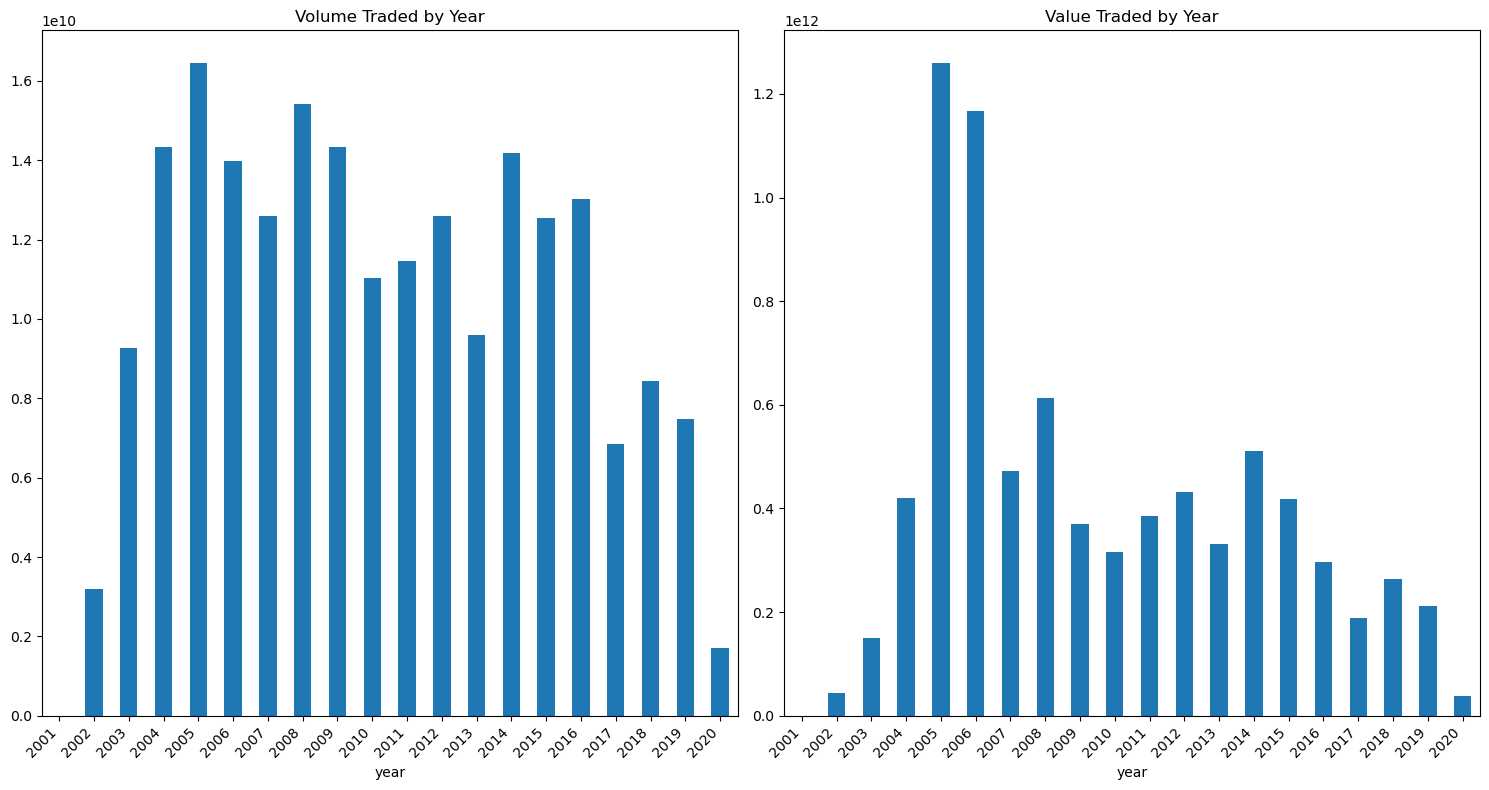

In [70]:
plt.figure(figsize=(15, 8))

# Plotting the first subplot
plt.subplot(1, 2, 1)
volumeTraded_byYear_Materials.plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.title('Volume Traded by Year')

# Plotting the second subplot
plt.subplot(1, 2, 2)
valueTraded_byYear_Materials.plot(kind='bar')  # Assuming valueTraded_byYear is your data
plt.xticks(rotation=45, ha='right')
plt.title('Value Traded by Year')

plt.tight_layout()
plt.savefig('volume value Traded of Materials.png')
# Adjust layout to prevent overlap
plt.show()

In this graph, the very large difference between the trading volume is observed by the year and the value of trading according to the year, and this indicates the decrease in the value of this sector throughout the year and in the year 2020 the largest decrease was due to coved



In this plot, the values of trading in the financial sector and the material sector were compared, and what has been observed is the high value of the materials sector


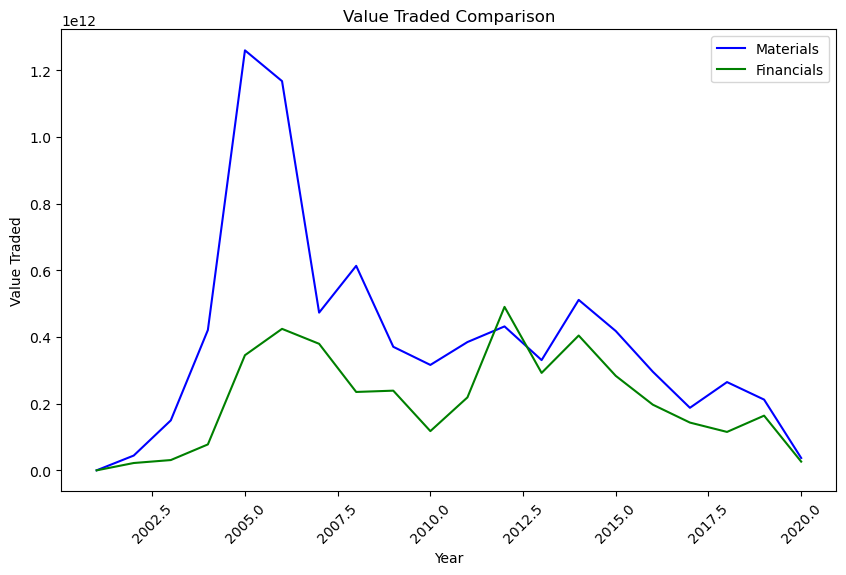

In [71]:

plt.figure(figsize=(10, 6))

# Plotting valueTraded_byYear_Materials
plt.plot(valueTraded_byYear_Materials.index, valueTraded_byYear_Materials.values, label='Materials', color='blue')

# Plotting valueTraded_byYear_Financials
plt.plot(valueTraded_byYear_financials.index, valueTraded_byYear_financials.values, label='Financials', color='green')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Value Traded')
plt.title('Value Traded Comparison')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

In [31]:
Real_Estatedf=df[df['sectoer']=='Real Estate']

Show the unique values of the real estate sector


In [32]:
Real_Estatedf.tradingName.unique()

array(['RIYAD REIT', 'ALJAZIRA REIT', 'JADWA REIT ALHARAMAIN',
       'TALEEM REIT', 'AL MAATHER REIT', 'MUSHARAKA REIT', 'MULKIA REIT',
       'MASHAAR REIT', 'ALAHLI REIT 1', 'DERAYAH REIT', 'Al RAJHI REIT',
       'JADWA REIT SAUDI', 'SEDCO CAPITAL REIT', 'SWICORP WABEL REIT',
       'MEFIC REIT', 'BONYAN REIT', 'ALKHABEER REIT', 'SRECO', 'TAIBA',
       'MCDC', 'ARDCO', 'EMAAR EC', 'RED SEA', 'JABAL OMAR',
       'DAR ALARKAN', 'KEC', 'ALANDALUS', 'ALMRAKEZ'], dtype=object)

Choose RIYAD_REIT to analyze its trading value from 2017 to 2019


In [33]:
RIYAD_REIT	= Real_Estatedf[Real_Estatedf['tradingName']=='RIYAD REIT']

In [43]:
RIYAD_REIT_2017=RIYAD_REIT[RIYAD_REIT['year']==2017]

In [46]:
RIYAD_REIT_2017_valueTraded=RIYAD_REIT_2017.groupby('month')['valueTraded'].sum()

In [47]:
RIYAD_REIT_2017_valueTraded

month
1     3.077744e+08
2     2.295606e+09
3     2.461689e+09
4     1.729314e+09
5     9.289960e+08
6     1.064327e+08
7     2.477140e+08
8     5.486815e+08
9     8.044595e+07
10    6.517287e+07
11    6.236472e+07
12    9.228603e+07
Name: valueTraded, dtype: float64

In [50]:
RIYAD_REIT_2018=RIYAD_REIT[RIYAD_REIT['year']==2018]

In [51]:
RIYAD_REIT_2018_valueTraded=RIYAD_REIT_2018.groupby('month')['valueTraded'].sum()

In [52]:
RIYAD_REIT_2018_valueTraded

month
1     61601403.67
2     41131454.28
3     37558545.92
4     35763535.43
5     30687853.53
6      8677219.89
7     61824785.02
8     17098972.19
9     21492255.86
10    28315927.58
11    19468703.83
12    15180605.37
Name: valueTraded, dtype: float64

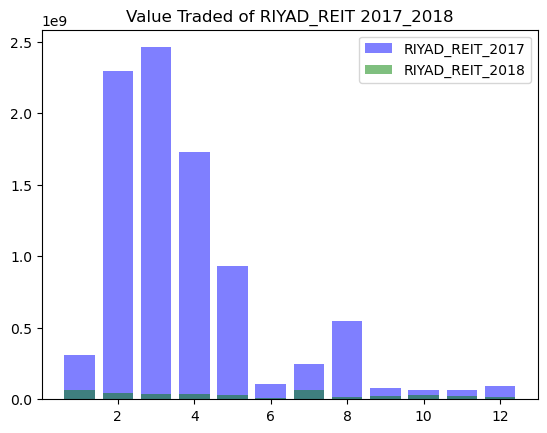

In [76]:
plt.bar(RIYAD_REIT_2017_valueTraded.index,RIYAD_REIT_2017_valueTraded.values,alpha=0.5,color='blue',label='RIYAD_REIT_2017')
plt.bar(RIYAD_REIT_2018_valueTraded.index,RIYAD_REIT_2018_valueTraded.values,alpha=0.5,color='green',label='RIYAD_REIT_2018')
plt.title('Value Traded of RIYAD_REIT 2017_2018')
plt.legend()

plt.show()

In [62]:
RIYAD_REIT_2019=RIYAD_REIT[RIYAD_REIT['year']==2019]

In [63]:
RIYAD_REIT_2019_valueTraded=RIYAD_REIT_2019.groupby('month')['valueTraded'].sum()

What was observed is the collapse of its trading value from the end of 2017 and the continuation of this collapse until the end of 2019

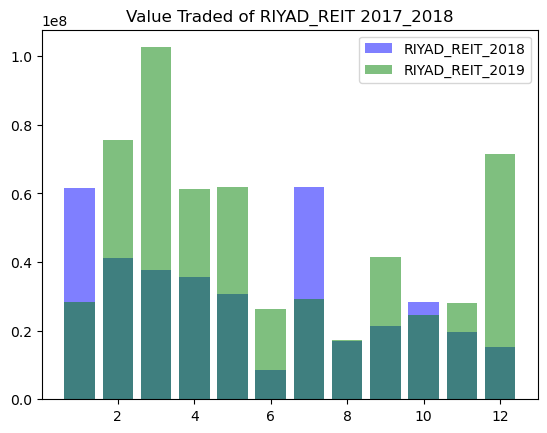

In [77]:
plt.bar(RIYAD_REIT_2018_valueTraded.index,RIYAD_REIT_2018_valueTraded.values,alpha=0.5,color='blue',label='RIYAD_REIT_2018')
plt.bar(RIYAD_REIT_2019_valueTraded.index,RIYAD_REIT_2019_valueTraded.values,alpha=0.5,color='green',label='RIYAD_REIT_2019')
plt.title('Value Traded of RIYAD_REIT 2017_2018')
plt.legend()
plt.show()

Conclusion
